# Explore here

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


None
4c2fe590117545e48d4a430d0f3553dd
Las 10 canciones principales de Quevedo son:
Columbia - Quevedo
Quevedo: Bzrp Music Sessions, Vol. 52 - Bizarrap, Quevedo
Buenas - Quevedo, Saiko
PUNTO G - Quevedo
OA - Anuel AA, Quevedo, Maluma, Mambo Kingz, DJ Luian
POLARIS - Remix - Saiko, Quevedo, Feid, Mora
VISTA AL MAR - Quevedo
PLAYA DEL INGLÉS - Quevedo, Myke Towers
WANDA - Quevedo
GANGSTER (PQFNEDG) - Ovy On The Drums, Quevedo, Yandel
                                    name  duration_ms  popularity
0                               Columbia       186000          95
1  Quevedo: Bzrp Music Sessions, Vol. 52       198937          89
2                                 Buenas       192954          86


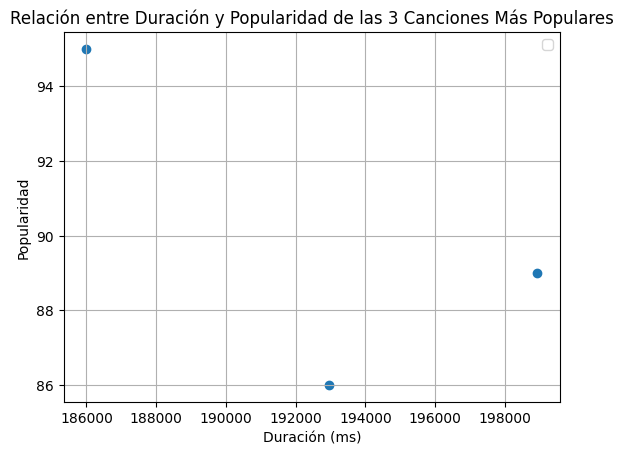

In [11]:
from dotenv import load_dotenv
import os
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIEND_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(client_id)
print(client_secret)

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Obtener el CLIENT_ID y CLIENT_SECRET desde las variables de entorno
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Configurar la autenticación con las claves
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = Spotify(auth_manager=auth_manager)

# Obtener las 10 canciones principales del artista
top_tracks = sp.artist_top_tracks(artist_id)

# Imprimir las 10 canciones principales
print(f"Las 10 canciones principales de {top_tracks['tracks'][0]['artists'][0]['name']} son:")
for track in top_tracks['tracks'][:10]:
    print(f"{track['name']} - {', '.join([artist['name'] for artist in track['artists']])}")

df = pd.json_normalize(top_tracks['tracks'])

df = df[['name', 'duration_ms', 'popularity']]

top3 = df.sort_values(by='popularity', ascending=False).head(3)

print(top3)

df_top3 = df.sort_values(by='popularity', ascending=False).head(3)


plt.scatter(df_top3['duration_ms'], df_top3['popularity'])
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.legend()
plt.title('Relación entre Duración y Popularidad de las 3 Canciones Más Populares')
plt.grid(True)

# Mostrar el gráfico
plt.show()

'''import seaborn as sns sns.scatterplot(data = top3, x = "duration_ms", y = "popularity", hue = "name") plt.xlabel('Duration') plt.ylabel('Popularity') plt.legend() plt.show()